# CRO Algorithm examples

## Example I: max_ones problem

[*Running] Initialization:  max_ones max


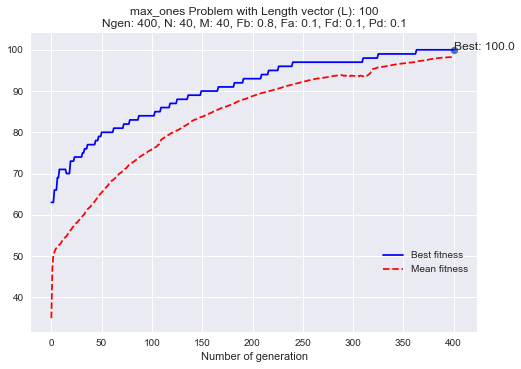

Best coral:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Best solution: 100.0


In [1]:
import numpy as np
import seaborn as sns 
from cro import *

## ------------------------------------------------------
## Parameters initialization

Ngen = 400                 # Number of generations
N  = 40                    # MxN: reef size
M  = 40                    # MxN: reef size
Fb = 0.8                   # Broadcast prob.
Fa = 0.1                   # Asexual reproduction prob.
Fd = 0.1                   # Fraction of the corals to be eliminated in the depredation operator.
r0 = 0.7                   # Free/total initial proportion
k  = 3                     # Number of opportunities for a new coral to settle in the reef
Pd = 0.1                   # Depredation prob.
opt= 'max'                 # flag: 'max' for maximizing and 'min' for minimizing
L = 100                    # coral length
## ------------------------------------------------------

cro = CRO(Ngen, N, M, Fb, Fa, Fd, r0, k, Pd, opt, L, problem_name='max_ones')
(REEF, REEFpob, REEFfitness, ind_best, Bestfitness, Meanfitness) = cro.fit()

## Example II: feature selection Classification (max auc)

[*Running] Initialization:  feature_selection max
Reef initialization: 0.685116630841
Best-fitness: 0.697735052942 
 0.0% completado 

Best-fitness: 0.9873815779 
 100% completado 



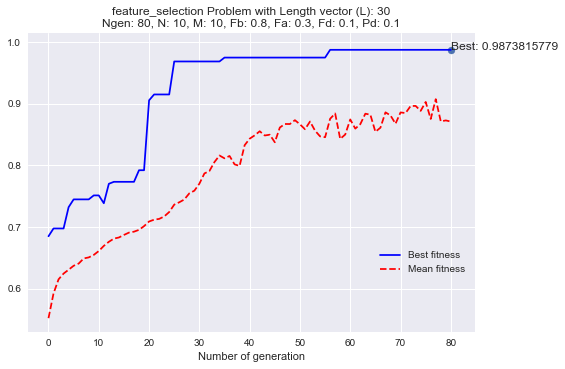

Best coral:  [0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
Best solution: 0.9873815779
['sd' 'Q25' 'centroid' 'meanfun' 'minfun' 'mindom']


In [1]:
## ------------------------------------------------------
## Parameters initialization

Ngen = 80                  # Number of generations
N  = 10                    # MxN: reef size
M  = 10                    # MxN: reef size
Fb = 0.8                   # Broadcast prob.
Fa = 0.3                   # Asexual reproduction prob.
Fd = 0.1                   # Fraction of the corals to be eliminated in the depredation operator.
r0 = 0.6                   # Free/total initial proportion
k  = 3                     # Number of opportunities for a new coral to settle in the reef
Pd = 0.1                   # Depredation prob.
opt= 'max'                 # flag: 'max' for maximizing and 'min' for minimizing

problem ='feature_selection'
## ------------------------------------------------------

import numpy as np
import seaborn as sns 
from cro import *
from utils import load_data 

dataset = load_data('voice')
L = dataset.data.shape[1] # number of features
X = dataset["data"]
y = dataset["target"]

from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(2)

cro = CRO(Ngen, N, M, Fb, Fa, Fd, r0, k, Pd, opt, L, seed=13, problem_name=problem, metric='auc', verbose=True)
(REEF, REEFpob, REEFfitness, ind_best, Bestfitness, Meanfitness) = cro.fit(X, y, clf)

names = np.array(dataset.feature_names)
print(names[REEFpob[:, ind_best]>0])

## Example III: feature selection, regression (min mse)

[*Running] Initialization:  feature_selection min
Reef initialization: 7.64243583865
Best-fitness: 7.64243583865 
 0.0% completado 

Best-fitness: 5.77043232626 
 100% completado 



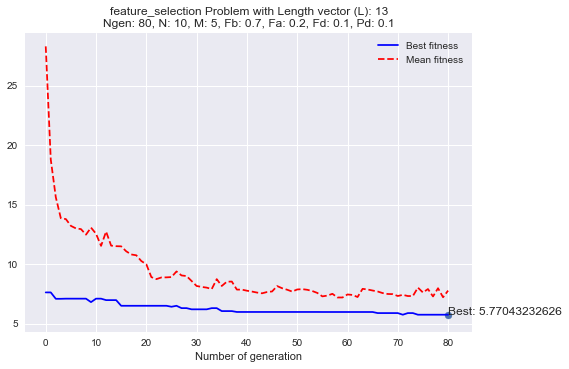

Best coral:  [1 0 1 0 1 1 1 1 0 0 1 1 1]
Best solution: 5.77043232626


In [4]:
import numpy as np
import seaborn as sns 
from cro import *

## ------------------------------------------------------
## Parameters initialization

Ngen = 80                  # Number of generations
N  = 10                    # MxN: reef size
M  = 5                    # MxN: reef size
Fb = 0.7                   # Broadcast prob.
Fa = 0.2                   # Asexual reproduction prob.
Fd = 0.1                   # Fraction of the corals to be eliminated in the depredation operator.
r0 = 0.7                   # Free/total initial proportion
k  = 3                     # Number of opportunities for a new coral to settle in the reef
Pd = 0.1                   # Depredation prob.
opt= 'min'                 # flag: 'max' for maximizing and 'min' for minimizing

problem ='feature_selection'
## ------------------------------------------------------

from sklearn import datasets, ensemble
from sklearn.metrics import r2_score, mean_squared_error   

dataset = datasets.load_boston()
L = dataset.data.shape[1] # number of features
X = dataset["data"]
y = dataset["target"]

params = {'n_estimators': 60, 'max_depth': 4, 'min_samples_split': 2}
clf = ensemble.GradientBoostingRegressor(**params)  

cro = CRO(Ngen, N, M, Fb, Fa, Fd, r0, k, Pd, opt, L, seed=13, problem_name=problem, metric=mean_squared_error, verbose=True)
(REEF, REEFpob, REEFfitness, ind_best, Bestfitness, Meanfitness) = cro.fit(X, y, clf)